# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,text_cleaned,verbs,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat
0,0,0,0,1,37,USA,m,married,y,24h,...,"['wife', 'celebrating', 'year', 'anniversary',...",[celebrating],"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1
1,1,1,1,1,37,USA,m,married,y,24h,...,"['mother', 'called', 'blue', 'tell', 'proud']","[called, tell]","[mother, blue]","[mother, she]",[],[called],[me],1,1,1
2,2,2,2,1,37,USA,m,married,y,24h,...,"['today', 'took', 'day', 'time', 'job', 'brunc...","[took, go, have]","[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1
3,3,3,3,1,37,USA,m,married,y,24h,...,"['just', 'got', 'bonus', 'mturk', 'task']",[got],"[bonus, mturk, task]",[I],[],[got],[bonus],1,1,1
4,4,4,4,1,37,USA,m,married,y,24h,...,"['wife', 'cooked', 'surprise', 'dinner', 'work']","[cooked, take, work]","[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1


# Feature Variables

## Age

In [10]:
print(df['age'].value_counts())
print('Null values: ', df['age'].isnull().sum())
df['age'].unique()

29.0    6176
26.0    6145
25.0    6019
30.0    5791
28.0    5751
        ... 
81.0       3
98.0       3
95.0       3
78.0       3
84.0       3
Name: age, Length: 69, dtype: int64
Null values:  0


array([37., 29., 25., 32., 35., 34., 61., 27., 45., 30., 40., 31., 28.,
       36., 44., 23., 26., 42., 41., 57., 24., 38., 43., 48., 53., 46.,
       54., 65., 59., 22., 47., 39., 21., 33., 55., 69., 68., 20., 49.,
       56., 62., 70., 83., 74., 51., 19., 52., 66., 58., 18., 60., 50.,
       72., 63., 67., 64., 77., 98., 73., 79., 80., 84., 88., 71., 75.,
       76., 95., 81., 78.])

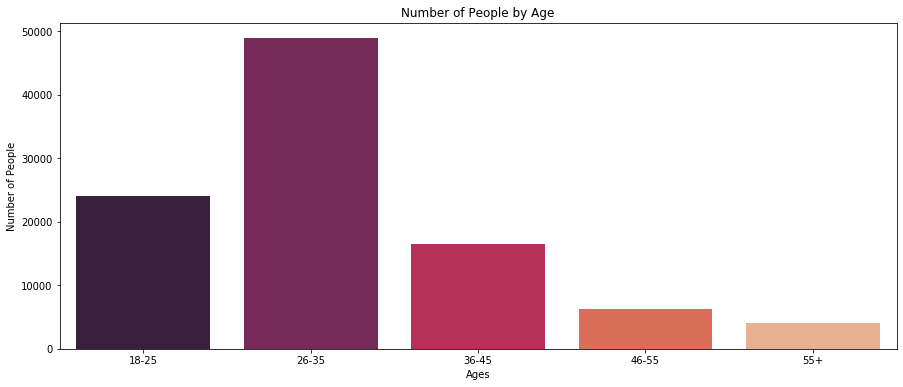

In [8]:
age18_25 = df.age[(df.age <= 25) & (df.age >= 18)]
age26_35 = df.age[(df.age <= 35) & (df.age >= 26)]
age36_45 = df.age[(df.age <= 45) & (df.age >= 36)]
age46_55 = df.age[(df.age <= 55) & (df.age >= 46)]
age55above = df.age[df.age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Age")
plt.xlabel("Ages")
plt.ylabel("Number of People")
plt.show()

## Gender

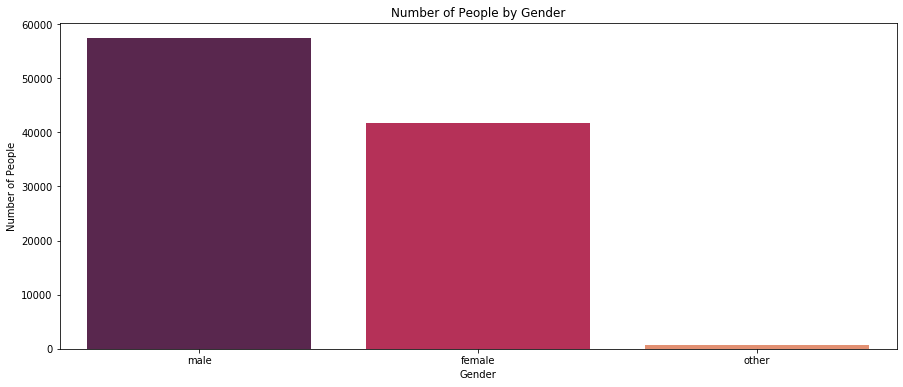

In [9]:
male = df[df['gender'] == 'm']
female = df[df['gender'] == 'f']
other = df[df['gender'] == 'o']

x = ['male', 'female', 'other']
y = [len(male.values),len(female.values),len(other.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()

# Marital

In [5]:
print(df['marital'].value_counts())
print('Null values: ', df['marital'].isnull().sum())

single       53839
married      41149
divorced      3770
separated      646
widowed        468
Name: marital, dtype: int64
Null values:  0


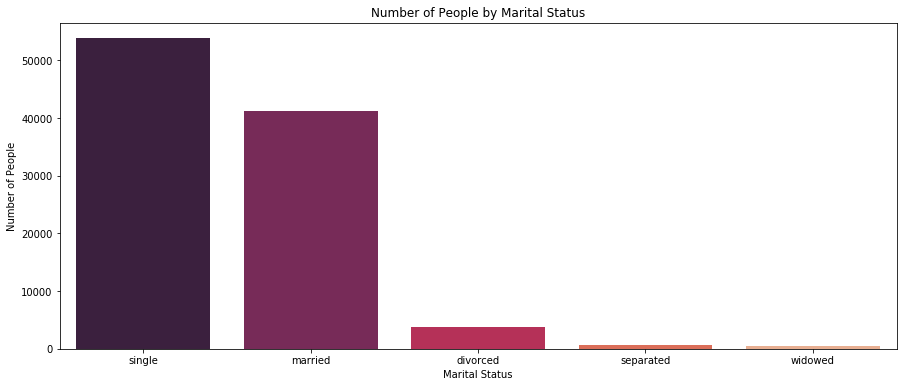

In [7]:
single = df[df['marital'] == 'single']
married = df[df['marital'] == 'married']
divorced = df[df['marital'] == 'divorced']
separated = df[df['marital'] == 'separated']
widowed = df[df['marital'] == 'widowed']

x = ['single', 'married', 'divorced', 'separated', 'widowed']
y = [len(single.values),len(married.values),len(divorced.values),len(separated.values),len(widowed.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of People")
plt.show()

# Parenthood

In [8]:
print(df['parenthood'].value_counts())
print('Null values: ', df['parenthood'].isnull().sum())

n    60605
y    39267
Name: parenthood, dtype: int64
Null values:  0


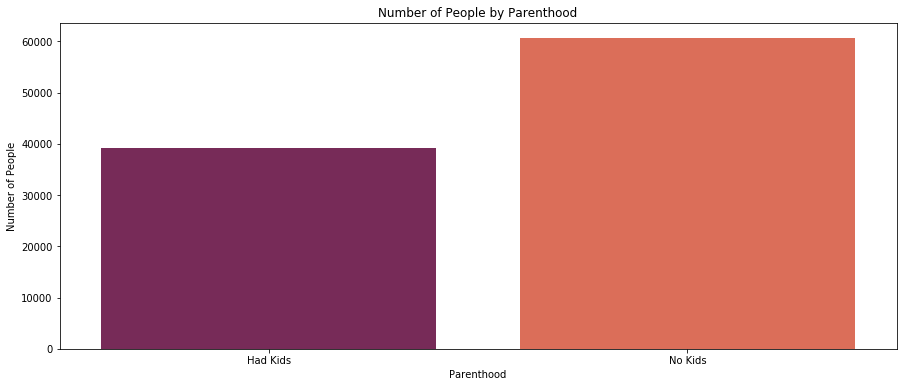

In [9]:
has_kids = df[df['parenthood'] == 'y']
no_kids = df[df['parenthood'] == 'n']

x = ['Had Kids', 'No Kids']
y = [len(has_kids.values),len(no_kids.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Parenthood")
plt.xlabel("Parenthood")
plt.ylabel("Number of People")
plt.show()

# Moms and Dads

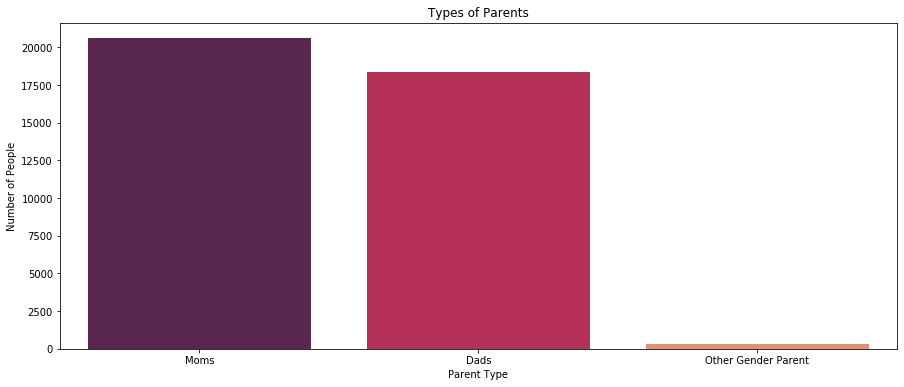

In [15]:
moms = df[(df['parenthood'] == 'y') & (df['gender'] == 'f')]
dads = df[(df['parenthood'] == 'y') & (df['gender'] == 'm')]
agender_parent = df[(df['parenthood'] == 'y') & (df['gender'] == 'o')]


x = ['Moms', 'Dads', 'Other Gender Parent']
y = [len(moms.values),len(dads.values),len(agender_parent.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Types of Parents")
plt.xlabel("Parent Type")
plt.ylabel("Number of People")
plt.show()

# Marital Status and Gender

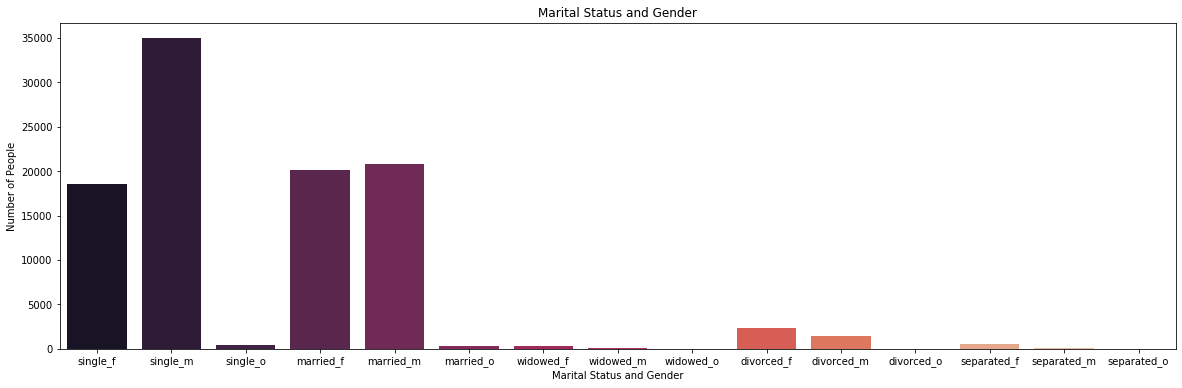

In [17]:
single_f = df[(df['marital'] == 'single') & (df['gender'] == 'f')]
single_m = df[(df['marital'] == 'single') & (df['gender'] == 'm')]
single_o = df[(df['marital'] == 'single') & (df['gender'] == 'o')]

married_f = df[(df['marital'] == 'married') & (df['gender'] == 'f')]
married_m = df[(df['marital'] == 'married') & (df['gender'] == 'm')]
married_o = df[(df['marital'] == 'married') & (df['gender'] == 'o')]

widowed_f = df[(df['marital'] == 'widowed') & (df['gender'] == 'f')]
widowed_m = df[(df['marital'] == 'widowed') & (df['gender'] == 'm')]
widowed_o = df[(df['marital'] == 'widowed') & (df['gender'] == 'o')]

divorced_f = df[(df['marital'] == 'divorced') & (df['gender'] == 'f')]
divorced_m = df[(df['marital'] == 'divorced') & (df['gender'] == 'm')]
divorced_o = df[(df['marital'] == 'divorced') & (df['gender'] == 'o')]

separated_f = df[(df['marital'] == 'separated') & (df['gender'] == 'f')]
separated_m = df[(df['marital'] == 'separated') & (df['gender'] == 'm')]
separated_o = df[(df['marital'] == 'separated') & (df['gender'] == 'o')]


x = ['single_f', 'single_m', 'single_o', 'married_f', 'married_m', 'married_o', 'widowed_f', 'widowed_m', 'widowed_o',
    'divorced_f', 'divorced_m', 'divorced_o', 'separated_f', 'separated_m', 'separated_o']
y = [len(single_f.values),len(single_m.values),len(single_o.values),len(married_f.values),len(married_m.values),
    len(married_o.values),len(widowed_f.values),len(widowed_m.values),len(widowed_o.values),len(divorced_f.values),
    len(divorced_m.values),len(divorced_o.values),len(separated_f.values),len(separated_m.values),len(separated_o.values)]

plt.figure(figsize=(20,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Marital Status and Gender")
plt.xlabel("Marital Status and Gender")
plt.ylabel("Number of People")
plt.show()

# Age and Marital Status

(With a focus on male/female, married/not-married)

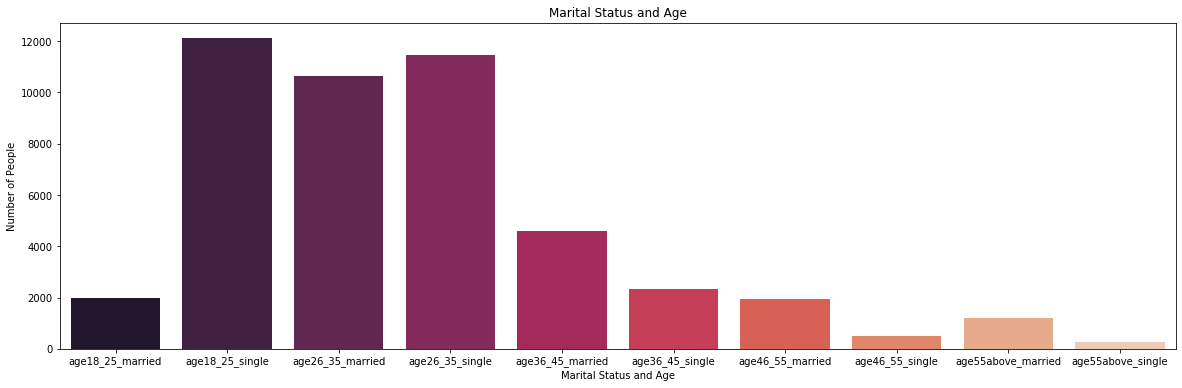

In [21]:
age18_25_married = df[(df.age[(df.age <= 25) & (df.age >= 18)]) & (df['marital']=='married')]
age26_35_married = df[(df.age[(df.age <= 35) & (df.age >= 26)]) & (df['marital']=='married')]
age36_45_married = df[(df.age[(df.age <= 45) & (df.age >= 36)]) & (df['marital']=='married')]
age46_55_married = df[(df.age[(df.age <= 55) & (df.age >= 46)]) & (df['marital']=='married')]
age55above_married = df[(df.age[df.age >= 56]) & (df['marital']=='married')]

age18_25_single = df[(df.age[(df.age <= 25) & (df.age >= 18)]) & (df['marital']=='single')]
age26_35_single = df[(df.age[(df.age <= 35) & (df.age >= 26)]) & (df['marital']=='single')]
age36_45_single = df[(df.age[(df.age <= 45) & (df.age >= 36)]) & (df['marital']=='single')]
age46_55_single = df[(df.age[(df.age <= 55) & (df.age >= 46)]) & (df['marital']=='single')]
age55above_single = df[(df.age[df.age >= 56]) & (df['marital']=='single')]

x = ['age18_25_married', 'age18_25_single', 'age26_35_married', 'age26_35_single', 'age36_45_married', 'age36_45_single', 
    'age46_55_married', 'age46_55_single', 'age55above_married', 'age55above_single']
y = [len(age18_25_married.values),len(age18_25_single.values),len(age26_35_married.values),
     len(age26_35_single.values),len(age36_45_married.values),
     len(age36_45_single.values),len(age46_55_married.values),len(age46_55_single.values),
     len(age55above_married.values),len(age55above_single.values)]

plt.figure(figsize=(20,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Marital Status and Age")
plt.xlabel("Marital Status and Age")
plt.ylabel("Number of People")
plt.show()

# Words in Responses

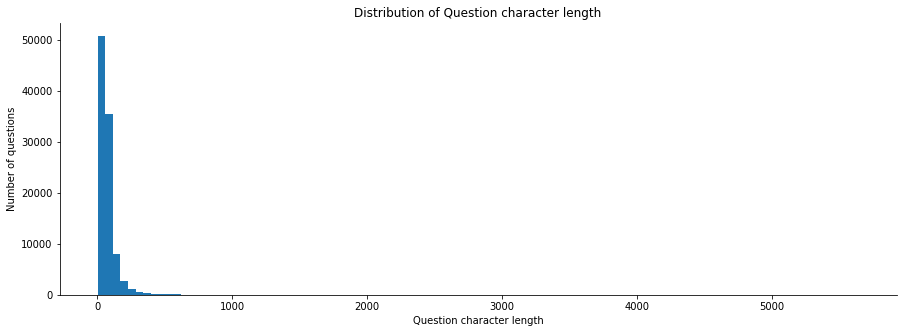

In [24]:
plt.figure(figsize=(15,5))
doc_lens = [len(d) for d in df.text_cleaned]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Question character length')
plt.ylabel('Number of questions')
plt.xlabel('Question character length')
sns.despine();

In [31]:
# Average number of words per response
average = sum(doc_lens) / len(doc_lens)
average

76.33281600448574

# Responses per worker

In [8]:
# Number of responses per worker
wid_df = df['wid'].value_counts()

# ID numbers
wid_indexes = wid_df.index

# Number of responses per ID
wid_values = wid_df.values

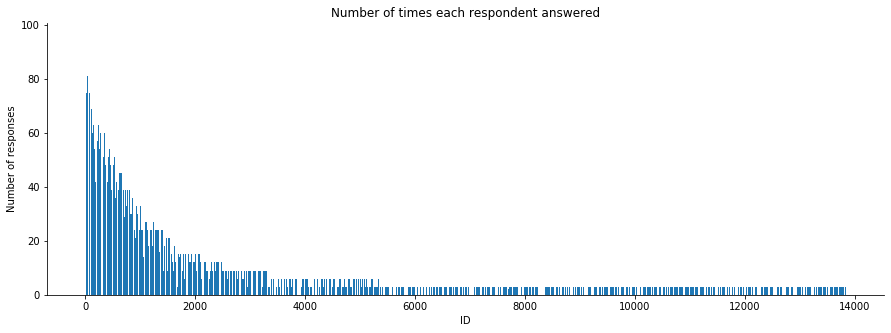

In [20]:
plt.figure(figsize=(15,5))
x = wid_indexes
y = wid_values
plt.bar(x,y)
plt.title('Number of times each respondent answered')
plt.ylabel('Number of responses')
plt.xlabel('ID')
sns.despine();

In [34]:
# Average number of responses per worker
average = sum(wid_values) / len(wid_values)
average

9.355690866510539

# Exploring the Possibility of Removing High Words and High Responses

In [37]:
# Creating a new column that shows total words in response
df['response_length'] = [len(d) for d in df.text_cleaned]

In [40]:
# What the number of rows and columns would be if I excluded responses with over 76 words
df[df['response_length'] < 76].shape

(67837, 22)

In [42]:
from collections import defaultdict

In [45]:
# Instantiate default dict
dd = defaultdict(list)

# Series of umber of responses per worker
wid_df = df['wid'].value_counts()

# Turning the series into a dictionary
id_dict = wid_df.to_dict(dd)

In [46]:
# Creating a new column that shows the number of responses for that ID
df['number_responses'] = [id_dict[the_id] for the_id in df.wid]

In [58]:
# What the number of rows and columns would be if I excluded IDs with over 50 responses
df[df['number_responses'] < 30].shape

(53930, 23)

In [57]:
# If I excluded high number of responses and high number of words.
df[(df['number_responses'] < 30) & (df['response_length'] < 76)].shape

(34624, 23)